https://github.com/CSSEGISandData/COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_confirmed = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [3]:
sorted(df_confirmed['Country/Region'].unique())[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda']

In [4]:
euro = [
'Austria',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Malta',
'Monaco',
'Moldova',
'Netherlands',
'North Macedonia',
'Norway',
'Poland',
'Portugal',
'Romania',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Turkey',
'Ukraine',
'United Kingdom'
]

In [5]:
# sum daily data for a particular list of counties
def preprocess_sum(df, countries):
    df_country = df[df['Country/Region'].isin(countries)].drop(df.columns[0:4], axis=1)
    df_country = df_country.apply(lambda c: np.sum(c), axis=0) # returns a series
    dates, ts_data = list(map(lambda i: i[:-3], df_country.index)), list(df_country)
    return dates, ts_data

In [6]:
# get daily counts of new events (infections, recoveries, deaths)
def preprocess_daily_new(df, countries):
    df_country = df[df['Country/Region'].isin(countries)].drop(df.columns[0:4], axis=1)
    df_country = df_country.apply(lambda c: np.sum(c), axis=0).diff() # returns a series
    dates, ts_data = list(map(lambda i: i[:-3], df_country.index[1:])), list(df_country)[1:]
    return dates, ts_data 

### China
Time series of infections in China

In [7]:
dates_ts, ts_infections_china = preprocess_sum(df_confirmed, ['China'])
_, ts_deaths_china = preprocess_sum(df_deaths, ['China'])
_, ts_recovered_china = preprocess_sum(df_recovered, ['China'])

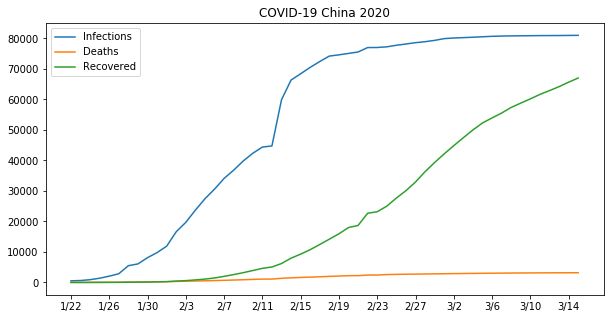

In [8]:
plt.figure(figsize=(10,5))
plt.plot(dates_ts, ts_infections_china, label="Infections")
plt.plot(dates_ts, ts_deaths_china, label="Deaths")
plt.plot(dates_ts, ts_recovered_china, label="Recovered")
plt.xticks(range(0, len(dates_ts), 4))
plt.legend()
plt.title('COVID-19 China 2020')
plt.show()

New infections, deaths, recovered

In [9]:
dates_daily, daily_infections_china = preprocess_daily_new(df_confirmed, ['China'])
_, daily_deaths_china = preprocess_daily_new(df_deaths, ['China'])
_, daily_recovered_china = preprocess_daily_new(df_recovered, ['China'])

In [10]:
df_new_events_china =  pd.DataFrame([daily_infections_china, daily_deaths_china, daily_recovered_china], 
                                    columns=dates_daily, index=['Infections', 'Deaths', 'Recovered'])
df_new_events_china.head()

,1/23,1/24,1/25,1/26,1/27,1/28,1/29,1/30,1/31,2/1,...,3/6,3/7,3/8,3/9,3/10,3/11,3/12,3/13,3/14,3/15
Infections,95.0,277.0,486.0,669.0,802.0,2632.0,578.0,2054.0,1661.0,2089.0,...,153.0,80.0,53.0,37.0,27.0,34.0,11.0,13.0,32.0,26.0
Deaths,1.0,8.0,16.0,14.0,26.0,49.0,2.0,38.0,42.0,46.0,...,29.0,28.0,28.0,23.0,16.0,22.0,11.0,8.0,13.0,10.0
Recovered,2.0,6.0,3.0,10.0,9.0,43.0,19.0,15.0,79.0,61.0,...,1652.0,1595.0,1849.0,1416.0,1377.0,1463.0,1257.0,1295.0,1464.0,1357.0


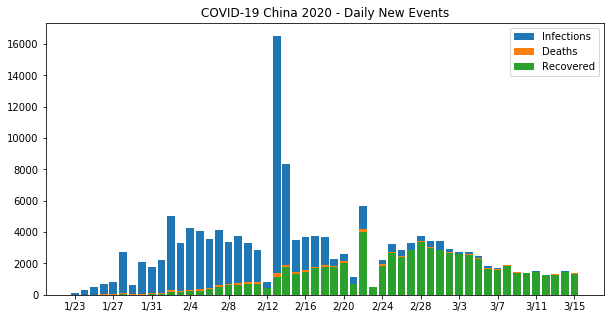

In [11]:
plt.figure(figsize=(10,5))
plt.bar(dates_daily, daily_infections_china, label="Infections", 
        bottom=np.array(daily_deaths_china+np.array(daily_recovered_china)))
plt.bar(dates_daily, daily_deaths_china, label="Deaths", bottom=daily_recovered_china)
plt.bar(dates_daily, daily_recovered_china, label="Recovered")
plt.xticks(range(0, len(dates_daily), 4))
plt.legend()
plt.title('COVID-19 China 2020 - Daily New Events')
plt.show()

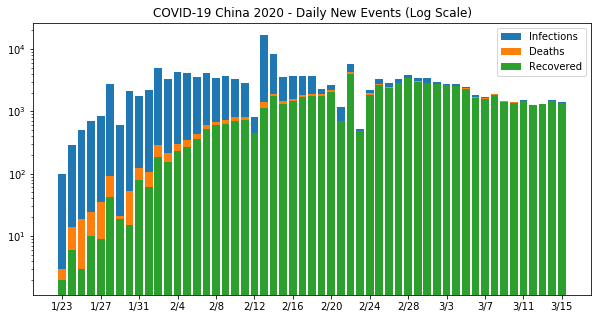

In [12]:
plt.figure(figsize=(10,5))
plt.bar(dates_daily, daily_infections_china, label="Infections", 
        bottom=np.array(daily_deaths_china+np.array(daily_recovered_china)), log=True)
plt.bar(dates_daily, daily_deaths_china, label="Deaths", bottom=daily_recovered_china, log=True)
plt.bar(dates_daily, daily_recovered_china, label="Recovered", log=True)
plt.xticks(range(0, len(dates_daily), 4))
plt.legend()
plt.title('COVID-19 China 2020 - Daily New Events (Log Scale)')
plt.show()

### Europe
Time series of infections in Europe

In [13]:
df_euro = df_confirmed[df_confirmed['Country/Region'].isin(euro)].drop(df_confirmed.columns[0:4], axis=1)
df_euro = df_euro.apply(lambda c: np.sum(c), axis=0) # returns a series
ts_infections_euro = list(df_euro)

In [14]:
_, ts_infections_euro = preprocess_sum(df_confirmed, euro)
_, ts_deaths_euro = preprocess_sum(df_deaths, euro)
_, ts_recovered_euro = preprocess_sum(df_recovered, euro)

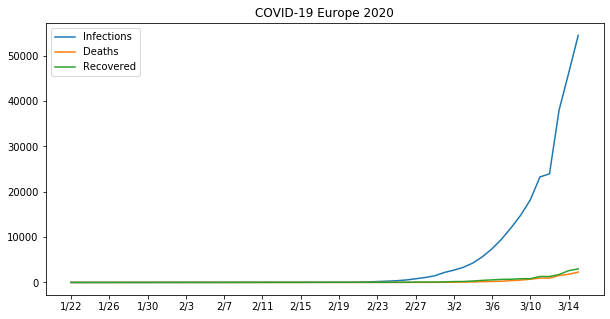

In [15]:
plt.figure(figsize=(10,5))
plt.plot(dates_ts, ts_infections_euro, label="Infections")
plt.plot(dates_ts, ts_deaths_euro, label="Deaths")
plt.plot(dates_ts, ts_recovered_euro, label="Recovered")
plt.xticks(range(0, len(dates_ts), 4))
plt.legend()
plt.title('COVID-19 Europe 2020')
plt.show()

New infections, deaths, recovered

In [16]:
_, daily_infections_euro = preprocess_daily_new(df_confirmed, euro)
_, daily_deaths_euro = preprocess_daily_new(df_deaths, euro)
_, daily_recovered_euro = preprocess_daily_new(df_recovered, euro)

In [17]:
df_new_events_euro =  pd.DataFrame([daily_infections_euro, daily_deaths_euro, daily_recovered_euro], 
                                    columns=dates_daily, index=['Infections', 'Deaths', 'Recovered'])
df_new_events_euro.head()

,1/23,1/24,1/25,1/26,1/27,1/28,1/29,1/30,1/31,2/1,...,3/6,3/7,3/8,3/9,3/10,3/11,3/12,3/13,3/14,3/15
Infections,0.0,2.0,1.0,0.0,1.0,4.0,2.0,0.0,6.0,5.0,...,1756.0,2133.0,2527.0,2774.0,3369.0,5034.0,692.0,14053.0,8160.0,8343.0
Deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,43.0,152.0,111.0,193.0,242.0,3.0,566.0,281.0,477.0
Recovered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111.0,107.0,33.0,109.0,6.0,483.0,0.0,432.0,865.0,380.0


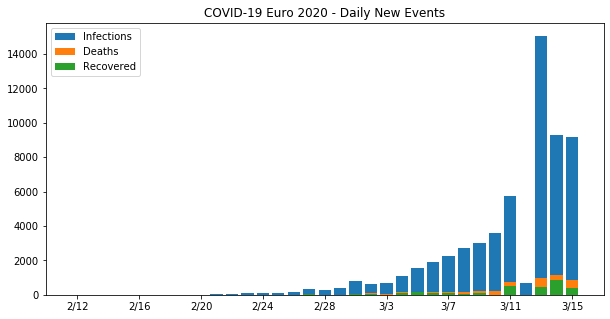

In [18]:
plt.figure(figsize=(10,5))
SKIP=20
plt.bar(dates_daily[SKIP:], daily_infections_euro[SKIP:], label="Infections", 
        bottom=np.array(daily_deaths_euro[SKIP:]+np.array(daily_recovered_euro[SKIP:])))
plt.bar(dates_daily[SKIP:], daily_deaths_euro[SKIP:], label="Deaths", bottom=daily_recovered_euro[SKIP:])
plt.bar(dates_daily[SKIP:], daily_recovered_euro[SKIP:], label="Recovered")
plt.xticks(range(0, len(dates_daily[SKIP:]), 4))
plt.legend()
plt.title('COVID-19 Euro 2020 - Daily New Events')
plt.show()

#### Plotting Europe vs China
Note that Europe's population is about half of China's

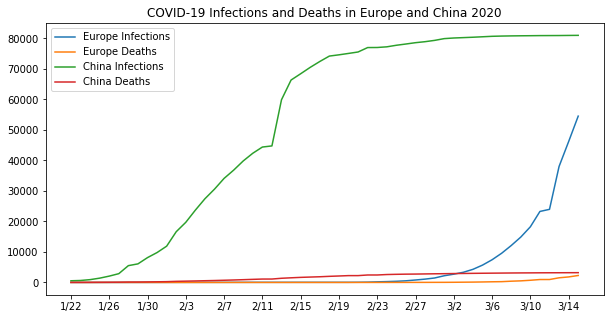

In [19]:
plt.figure(figsize=(10,5))
plt.plot(dates_ts, ts_infections_euro, label="Europe Infections")
plt.plot(dates_ts, ts_deaths_euro, label="Europe Deaths")

plt.plot(dates_ts, ts_infections_china, label="China Infections")
plt.plot(dates_ts, ts_deaths_china, label="China Deaths")
plt.xticks(range(0, len(dates_ts), 4))

plt.legend()
plt.title('COVID-19 Infections and Deaths in Europe and China 2020')
plt.show()

Closer look at death rates

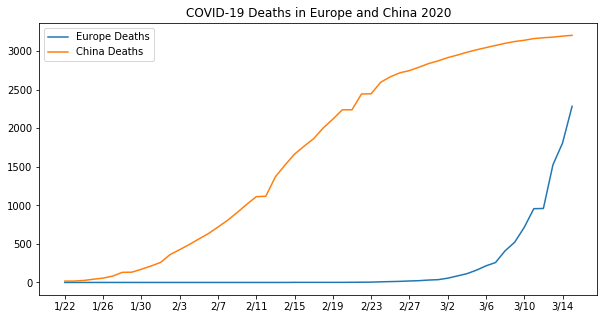

In [20]:
plt.figure(figsize=(10,5))
plt.plot(dates_ts, ts_deaths_euro, label="Europe Deaths")
plt.plot(dates_ts, ts_deaths_china, label="China Deaths")
plt.xticks(range(0, len(dates_ts), 4))
plt.legend()
plt.title('COVID-19 Deaths in Europe and China 2020')
plt.show()